In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os
import tweepy
import re

%matplotlib inline

# 收集数据


### 1、读取CSV文件到数据框中

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

### 2、收集推特图像的预测数据

In [3]:
# 从网页获取所需的数据
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
response = requests.get(url)

In [4]:
# 将数据保存到电脑上
with open(os.path.join(url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [5]:
# 读取文件为数据框
df_image = pd.read_csv('image-predictions.tsv',sep = '\t')

### 3、使用 Tweepy 来查询推特 API，收集数据

In [16]:
# 创建API对象用于收集推特数据
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [17]:
# 获取推特数据并写入txt中
with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for tweet_id in df_twitter['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 726
Rate limit reached. Sleeping for: 729


In [6]:
# 逐行读取tweet_json.txt
tweet_data = []

file = open('tweet_json.txt', "r")

for line in file:
    try:
        tweet = json.loads(line)
        tweet_data.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count']})
    except:
        continue
        
file.close()

In [7]:
df_tweet = pd.DataFrame(tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# 评估数据

### 1、使用目测评估数据集

In [8]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8563,38701
1,892177421306343426,6299,33175
2,891815181378084864,4180,24974
3,891689557279858688,8694,42101
4,891327558926688256,9455,40244
5,891087950875897856,3133,20180
6,890971913173991426,2086,11821
7,890729181411237888,18998,65387
8,890609185150312448,4284,27734
9,890240255349198849,7455,31880


### 2、使用编程评估数据集

#### df_twitter数据集

In [11]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
621,796116448414461957,NaN,NaN,2016-11-08 22:25:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't believe it at first but now I can see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796116448...,11,10,None,None,None,None,None
2183,668989615043424256,NaN,NaN,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,3,10,Bernie,None,None,None,None
525,809084759137812480,NaN,NaN,2016-12-14 17:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
1389,700167517596164096,NaN,NaN,2016-02-18 03:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dotsy. She's stuck as hell. 10/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700167517...,10,10,Dotsy,None,None,None,None


In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_twitter.source.value_counts()                        

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
df_twitter['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Bailey        7
Toby          7
Daisy         7
an            7
Leo           6
Oscar         6
Scout         6
Bella         6
Stanley       6
Dave          6
Rusty         6
Jack          6
Koda          6
Jax           6
Milo          6
George        5
           ... 
Chevy         1
Smiley        1
Darrel        1
Tyrus         1
Duddles       1
Zara          1
Nimbus        1
Mya           1
Ralpher       1
Winifred      1
Kramer        1
Ralphé        1
Chuq          1
Storkson      1
Chaz          1
Gert          1
Bode          1
Clybe         1
Anna          1
Pancake       1
Miley         1
Iroh          1
Remus         1
Sailor        1
Rontu         1
Wesley        1
Shawwn        1
this          1
Bobby         1
Lacy          1
Name: name, Length: 957,

In [16]:
df_twitter.columns.values.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [17]:
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
sum(df_twitter['expanded_urls'].isnull())

59

#### df_image 数据集

In [20]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,dogsled,0.426494,False,cocker_spaniel,0.073101,True,Chihuahua,0.070323,True
134,668484198282485761,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
1510,786036967502913536,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True


In [21]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
df_image['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

#### df_tweet数据集

In [24]:
df_tweet.sample(5)

,tweet_id,retweet_count,favorite_count
176,857029823797047296,4205,19474
1221,713175907180089344,1576,4750
85,875747767867523072,4336,25193
782,773547596996571136,6888,23923
2196,668627278264475648,119,329


In [25]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [26]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3016.875906,8047.849041
std,6.833642e+16,5018.330285,12110.971622
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,605.000000,1403.000000
50%,7.189392e+17,1405.000000,3526.000000
75%,7.986979e+17,3511.000000,9944.000000
max,8.924206e+17,77168.000000,143078.000000


### 质量

#### df_twitter数据集

- source 含有格式字符  
- name 列内容提取不正确
- tweet_id数据类型是int，不正确
- timestamp时间格式错误  
- in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp 为转发的信息
- 评分列rating_numerator/rating_denominator 部分内容提取错误  
- expanded_urls 列内容有缺失
- 含有没有图片的推文条目，我们只需要含有图片的原始评级 (不包括转发)

#### df_image数据集

- tweet_id数据类型是int，不正确 
- p1\p2\p3 名字大小写不一致

#### df_tweet数据集

- tweet_id数据类型是int，不正确

### 清洁度

- “地位”（即 doggo、floofer、pupper 和 puppo）分开在四列中
- df_twitter\df_image\df_tweet 不在一个数据集中

# 清理数据

In [27]:
# 将原始数据进行备份
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

- source 含有格式字符

#### 定义

使用正则表达式提取正确的内容，并删除格式字符

#### 代码

In [28]:

def get_content(url):
    res=r'<a .*?>(.*?)</a>'
    text=re.findall(res,url,re.S|re.M)
    return text

In [29]:
df_twitter_clean['source']=df_twitter_clean.source.apply(get_content)

#### 测试

In [30]:
df_twitter_clean['source']

0       [Twitter for iPhone]
1       [Twitter for iPhone]
2       [Twitter for iPhone]
3       [Twitter for iPhone]
4       [Twitter for iPhone]
5       [Twitter for iPhone]
6       [Twitter for iPhone]
7       [Twitter for iPhone]
8       [Twitter for iPhone]
9       [Twitter for iPhone]
10      [Twitter for iPhone]
11      [Twitter for iPhone]
12      [Twitter for iPhone]
13      [Twitter for iPhone]
14      [Twitter for iPhone]
15      [Twitter for iPhone]
16      [Twitter for iPhone]
17      [Twitter for iPhone]
18      [Twitter for iPhone]
19      [Twitter for iPhone]
20      [Twitter for iPhone]
21      [Twitter for iPhone]
22      [Twitter for iPhone]
23      [Twitter for iPhone]
24      [Twitter for iPhone]
25      [Twitter for iPhone]
26      [Twitter for iPhone]
27      [Twitter for iPhone]
28      [Twitter for iPhone]
29      [Twitter for iPhone]
                ...         
2326    [Twitter for iPhone]
2327    [Twitter for iPhone]
2328    [Twitter for iPhone]
2329    [Twitt

In [31]:
df_twitter_clean['source'].sample(5)

1789    [Twitter for iPhone]
2299    [Twitter for iPhone]
989     [Twitter for iPhone]
2309    [Twitter for iPhone]
1207    [Twitter for iPhone]
Name: source, dtype: object

- name 列内容提取不正确

#### 定义

名字是小写字母的，对其进行重新提取text列内容中含"name is "\"named"后面的名字，对于没有名字的替换成"No_name"。None的替换成"No_name"

#### 代码

In [32]:
# 定义创建查找姓名的dataframe
def name_replace(call_type):
    if call_type == '':
        df_replace = df_twitter_clean.loc[(df_twitter_clean['name'].str.islower())]
    else:
        df_replace = df_twitter_clean.loc[(df_twitter_clean['name'].str.islower()) & (df_twitter_clean['text'].str.contains(call_type))]
    return df_replace

In [33]:
# 筛选出name 列中名字是小写，text列中含有name is 的内容
nameis_replace = name_replace('name is')

In [34]:
# 筛选出name 列中名字是小写，text列中含有named 的内容
named_replace = name_replace('named')

In [35]:
# 筛选出name 列中名字是小写
notname_replace =  name_replace('')

In [36]:
# 定义dataframe 转化为list 的函数
def dataframe_to_list(dataframe):
    to_list = dataframe['text'].tolist()
    return to_list

In [37]:
# 将筛选出来的dataframe中的text列内容转化成列表形式
nameis_replace_list = dataframe_to_list(nameis_replace)
named_replace_list = dataframe_to_list(named_replace)
notname_replace_list = dataframe_to_list(notname_replace)

In [38]:
# 替换name is 后面正确的name 名字
for entry in nameis_replace_list:
    mask = df_twitter_clean.text == entry
    name_column = 'name'
    df_twitter_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry) 

In [39]:
# 替换named 后面正确的name 名字
for entry in named_replace_list:
    mask = df_twitter_clean.text == entry
    name_column = 'name'
    df_twitter_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

In [40]:
# 将没有名字的替换为No_name
for entry in notname_replace_list:
    mask = df_twitter_clean.text == entry
    name_column = 'name'
    df_twitter_clean.loc[mask, name_column] = "No_name"

In [41]:
# None的替换成"No_name"
df_twitter_clean['name'] = df_twitter_clean['name'].replace('None', "No_name")

#### 测试

In [42]:
df_twitter_clean.name.value_counts()

No_name     854
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
Buddy         7
Bailey        7
Daisy         7
Toby          7
Rusty         6
Milo          6
Jack          6
Stanley       6
Bella         6
Koda          6
Jax           6
Leo           6
Dave          6
Scout         6
Oscar         6
Louis         5
Chester       5
George        5
Gus           5
           ... 
Jeffrie       1
Rumble        1
Crumpet       1
Nida          1
Pippin        1
Julio         1
Jessifer      1
Edd           1
Sailer        1
Godzilla      1
Benny         1
Lupe          1
Angel         1
Rodman        1
DonDon        1
Nugget        1
Staniel       1
Clarkus       1
Willy         1
Cuddles       1
Lili          1
Butters       1
Iggy          1
Scott         1
Tove          1
Dug           1
Walker        1
Kingsley      1
Tanner        1
Lacy          1
Name: name, Length: 932,

In [43]:
df_twitter_clean['name'].sample(5)

2065      No_name
1533       Covach
46      Grizzwald
2189      No_name
1782      No_name
Name: name, dtype: object

- df_twitter数据集、df_image数据集、df_tweet数据集 tweet_id数据类型是int，不正确

#### 定义

tweet_id列应该是object类型，用astype() 把int改成object。

#### 代码

In [44]:
# 更改df_twitter数据集、df_image数据集、df_tweet数据集 tweet_id数据类型
df_twitter_clean['tweet_id'] = df_twitter_clean.tweet_id.astype('object')
df_image_clean['tweet_id'] = df_image_clean.tweet_id.astype('object')
df_tweet_clean['tweet_id'] = df_tweet_clean.tweet_id.astype('object')

#### 测试

In [45]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [46]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [47]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


- timestamp时间格式错误

#### 定义

使用to_datetime 更改timestamp时间格式

#### 代码

In [48]:
df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean.timestamp)

#### 测试

In [49]:
df_twitter_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

- in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp 为转发的信息

#### 定义

in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp 为转发的信息，这几列为non-null的所有条目删除（选出这几列为空值的行）。都为空值了，移除掉这几列。

#### 代码

In [50]:
del_column = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

# 选出为空值的行
df_twitter_clean=df_twitter_clean[df_twitter_clean.in_reply_to_status_id.isnull()]
df_twitter_clean=df_twitter_clean[df_twitter_clean.in_reply_to_user_id.isnull()]
df_twitter_clean=df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull()]
df_twitter_clean=df_twitter_clean[df_twitter_clean.retweeted_status_timestamp.isnull()]
df_twitter_clean=df_twitter_clean[df_twitter_clean.retweeted_status_user_id.isnull()]


In [51]:
# 移除这些空值列
for col in del_column:
    del df_twitter_clean[col]

#### 测试

In [52]:
df_twitter_clean.columns.values.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

- 评分列rating_numerator/rating_denominator 部分内容提取错误

#### 定义

查找评分通常不以 10 作为分母的数据，将其与text进行比较，修改为正确的评分

#### 代码

In [53]:
# 创建分母不是10的数据框
df_twitter_clean_not10 = df_twitter_clean[df_twitter_clean.rating_denominator!=10]

In [54]:
df_twitter_clean_not10.text.value_counts()

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5                                  1
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                                                       1
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                     1
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55                                 1
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                               1
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                  

In [55]:
rating_fix = ["Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a",
             "After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",
             "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
             "This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv",
             "This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5",
             "RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",
             "This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq"]

In [56]:
for entry in rating_fix:
    mask = df_twitter_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_twitter_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_twitter_clean.loc[mask, column_name2] = 10

#### 测试

In [57]:
df_twitter_clean[df_twitter_clean.text.isin(rating_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38,[Twitter for iPhone],"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,No_name,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,[Twitter for iPhone],Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,No_name,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,[Twitter for iPhone],This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13,[Twitter for iPhone],This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11,[Twitter for iPhone],This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,No_name,None,None,None,None


- expanded_urls 列内容有缺失

#### 定义

使用dropna，删除内容有缺失的行

#### 代码

In [58]:
df_twitter_clean = df_twitter_clean.dropna(subset=['expanded_urls'])

#### 测试

In [59]:
sum(df_twitter_clean['expanded_urls'].isnull())

0

- p1\p2\p3 名字大小写不一致

#### 定义

使用str.lower() 把p1\p2\p3名字改成全小写。

#### 代码

In [60]:
# 把p1\p2\p3名字改成全小写
df_image.p1 = df_image.p1.str.lower()
df_image.p2 = df_image.p2.str.lower()
df_image.p3 = df_image.p3.str.lower()

#### 测试

In [61]:
df_image.p1.sample(5)

1274    labrador_retriever
409                   suit
604                  llama
533                hamster
1816                kuvasz
Name: p1, dtype: object

In [62]:
df_image.p2.sample(5)

1987     sussex_spaniel
1189     cocker_spaniel
841            fur_coat
503                hare
643     german_shepherd
Name: p2, dtype: object

In [63]:
df_image.p3.sample(5)

911       bullfrog
1401    rottweiler
1223        collie
159       cardigan
1897      shih-tzu
Name: p3, dtype: object

- “地位”（即 doggo、floofer、pupper 和 puppo）分开在四列中

#### 定义

创建stage列合并四列内容，将分开的四列内容删除

#### 代码

In [64]:
df_twitter_clean.replace('None', np.nan, inplace=True)
df_twitter_clean['stage'] = df_twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)

In [65]:
# 删除doggo、floofer、pupper 和 puppo列
col = ['doggo', 'floofer', 'pupper', 'puppo']
df_twitter_clean = df_twitter_clean.drop(col, axis=1)

In [66]:
df_twitter_clean ['stage'].value_counts()

                1759
pupper           220
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

依次对doggopuppo\doggofloofer\doggopupper进行判断狗狗的地位，并将其修改为正确的。

In [67]:
# 筛选出对应的text值，并获得正确的狗狗地位。
df_twitter_clean[df_twitter_clean['stage'] == 'doggopuppo'].text.value_counts()

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel    1
Name: text, dtype: int64

In [68]:
# 修正狗狗的地位
df_twitter_clean.loc[df_twitter_clean['stage'] == 'doggopuppo', 'stage'] = 'puppo'

In [69]:
df_twitter_clean[df_twitter_clean['stage'] == 'doggofloofer'].text.value_counts()

At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk    1
Name: text, dtype: int64

In [70]:
df_twitter_clean.loc[df_twitter_clean['stage'] == 'doggofloofer', 'stage'] = 'floofer'

In [71]:
df_twitter_clean[df_twitter_clean['stage'] == 'doggopupper'].text.value_counts()

This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC                                                                             1
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8                                1
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd    1
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                        1
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                        1
Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u                                                                                            

In [72]:
df_twitter_clean.loc[df_twitter_clean['stage'] == 'doggopupper', 'stage'] = 'doggo,pupper'

#### 测试

In [74]:
df_twitter_clean ['stage'].value_counts()

                1759
pupper           220
doggo             72
puppo             24
floofer           10
doggo,pupper       9
Name: stage, dtype: int64

- df_twitter\df_image\df_tweet 不在一个数据集中

#### 定义

使用pd.merge函数，how='inner'(可以删掉没有图片的推文条目)，将df_image_clean\df_tweet_clean\df_twitter_clean合并到新数据集中

#### 代码

In [75]:
df_twitter_clean_1 = pd.merge(df_twitter_clean, df_tweet_clean,on=['tweet_id'], how='inner')

In [76]:
df_twitter_clean_1 = pd.merge(df_twitter_clean_1, df_image_clean,on=['tweet_id'], how='inner')

#### 测试

In [77]:
df_twitter_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null object
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 1971 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-

In [78]:
df_twitter_clean_1.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1290,684195085588783105,2016-01-05 02:09:54,[Twitter for iPhone],This is Tino. He really likes corndogs. 9/10 h...,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,,569,...,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True
581,772117678702071809,2016-09-03 17:02:54,[Twitter for iPhone],Meet Jack. He's a Clemson pup. Appears to be r...,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,,815,...,1,Labrador_retriever,0.217821,True,beagle,0.157677,True,golden_retriever,0.127726,True
330,819004803107983360,2017-01-11 02:15:36,[Twitter for iPhone],This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,40945,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
492,788150585577050112,2016-10-17 22:51:57,[Twitter for iPhone],This is Leo. He's a golden chow. Rather h*ckin...,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,,1462,...,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True
426,800141422401830912,2016-11-20 00:59:15,[Twitter for iPhone],This is Peaches. She's the ultimate selfie sid...,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,,2882,...,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True


# 存储数据

In [79]:
# 将清理好的数据存储为新的文件
df_twitter_clean_1.to_csv('twitter_archive_master.csv', index=False)

# 数据分析

In [80]:
# 获取清理后的数据
df = pd.read_csv('twitter_archive_master.csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float6

对狗狗不同地位的情况，转发数以及喜爱数进行探究。

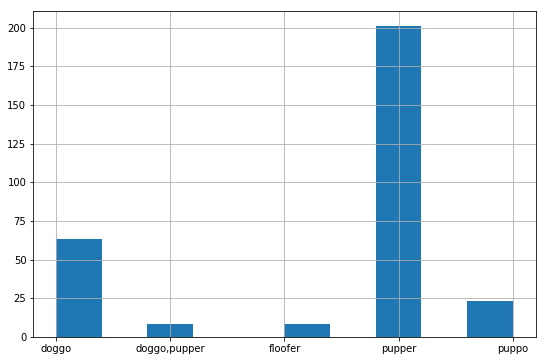

In [84]:
df['stage'].hist(figsize=(9,6));

由上面的直方图可知，狗狗的地位中pupper所占的数量最多，是所有狗狗地位中最多的。下面对狗狗的地位分析其转发数的情况：

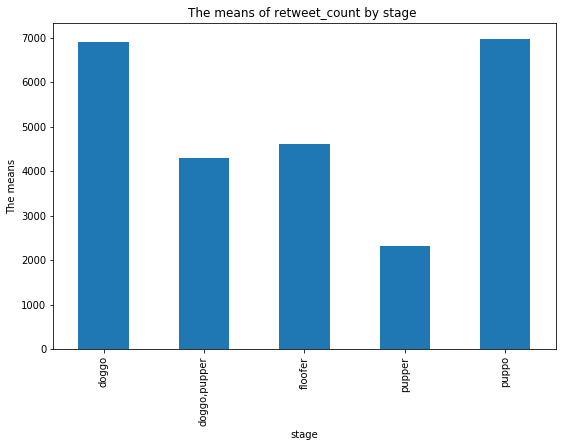

In [85]:
retweet_count_means = df.groupby('stage')['retweet_count'].mean()
retweet_count_means.plot(kind = 'bar',figsize=(9,6))
plt.title('The means of retweet_count by stage ')
plt.ylabel('The means');

由上图可知，狗狗不同地位中，doggo,puppo地位的狗狗转发数的平均值最高；pupper地位的狗狗转发数的平均值最低。下面对狗狗不同地位的喜爱数进行分析：

stage
doggo           18993.523810
doggo,pupper    13120.375000
floofer         13388.000000
pupper           7178.134328
puppo           23263.869565
Name: favorite_count, dtype: float64


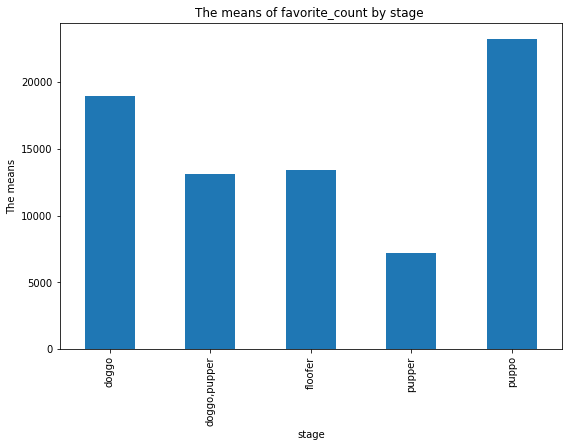

In [86]:
favorite_count_means = df.groupby('stage')['favorite_count'].mean()
print(favorite_count_means)
favorite_count_means.plot(kind = 'bar',figsize=(9,6))
plt.title('The means of favorite_count by stage ')
plt.ylabel('The means');

由上图可知，不同地位的狗狗中，其中puppo 地位的狗狗喜爱的平均值最高，其次是doggo地位的狗狗。因此这两种地位的狗狗受大家喜爱。

#### 结论

1、不同狗狗地位中，pupper所占的数量最多，估计推特上以此种地位的狗狗居多。  
2、不同狗狗地位中，puppo\doggo地位的狗狗转发数的平均值最高，puppo 地位的狗狗喜爱数的平均值最高，由此可知puppo 地位的狗狗大家更喜欢。  
3、由以上数据得出，不同地位的狗狗转发数与狗狗喜爱数是有一定的关系的。